In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MainData_updated.csv")
df

,Enlem,Boylam,İlçe,Tür,Modern Değeri,Traditional Değeri,Hotel Değeri,Ortalama Harcama Tutarı,Restoran Çeşidi,Map Profile Score,Map Population Score,Mapin Segment
0,40.995444,29.024803,KADIKÖY,HOTEL,5,0,2,750.0,Business,NaN,NaN,H2
1,40.980917,29.101372,ATAŞEHİR,HOTEL,5,0,1,2000.0,"Banket, Event, Etkinlik Oteli",NaN,NaN,H1
2,41.054086,29.051875,ÜSKÜDAR,HOTEL,5,0,1,750.0,"Diğer (Apart, Pansiyon)",NaN,NaN,H1
3,41.019103,28.957953,ÜSKÜDAR,MODERN,4,0,0,750.0,Tekne-Event Hall-Catering,67.1815,54.2895,D4-C
4,40.965051,29.072068,KADIKÖY,MODERN,3,0,0,750.0,Modern Pub & Bistro,77.7405,62.0554,D3-B
...,...,...,...,...,...,...,...,...,...,...,...,...
781,40.976207,29.047311,KADIKÖY,TRADITIONAL,0,0,0,2000.0,Geleneksel Meyhane,73.4570,66.8130,R3-B
782,40.986261,29.033062,KADIKÖY,MODERN,0,0,0,1500.0,"Dg.Mdrn(Tekne,S.Ev,S.house,Ct)",73.3350,64.1790,D3-B
783,40.940802,29.111243,KADIKÖY,TRADITIONAL,0,0,0,2000.0,Kebap,NaN,NaN,R2-B
784,41.002037,29.154804,ATAŞEHİR,TRADITIONAL,0,0,0,1500.0,Kebap,NaN,NaN,R3-B


In [3]:
# Ortalama Harcama Tutarı sütununu medyan değeler ile doldurma
df["Ortalama Harcama Tutarı"] = df["Ortalama Harcama Tutarı"].fillna(df["Ortalama Harcama Tutarı"].mean())

In [4]:
# Map Profile Score ve Map Population Score sütunlarındaki NaN değerlere sahip olan satırları silme
df = df.dropna(subset=["Map Profile Score", "Map Population Score"])

In [5]:
# İlçe | Alternatif A: One-Hot Encoding
df = pd.get_dummies(df, columns=['İlçe'], prefix='ilce', dtype=int)

In [6]:
"""
Mapin Segment’i kullanma, çünkü:
Zaten bağımlı, türetilmiş bir değişken.
Map Population Score + Map Profile Score varken fazlalık olabilir.
"""
df.drop(columns=["Mapin Segment"], inplace=True)

In [7]:
# Restoran çeşidi sütunu analizi
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].astype(str)
print(df["Restoran Çeşidi"].value_counts())
print(df["Restoran Çeşidi"].dtype)

# Restoran Çeşidi sütunundaki bazı değerleri birleştirme
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Diğer Bistro Cafe', 'Pub & Bistro & Kokteyl Bar')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Kokteyl Bar', 'Pub & Bistro & Kokteyl Bar')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Premium Bistro Cafe', 'Pub & Bistro & Kokteyl Bar')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Gece Kulübü & Etkinlik', 'Gece Kulübü')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Pavyon', 'Gece Kulübü')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Uzak Doğu Mutfağı', 'Dünya Mutfağı')
df["Restoran Çeşidi"] = df["Restoran Çeşidi"].replace('Banket, Event, Etkinlik Oteli', 'Tekne-Event Hall-Catering')

# Çok az örneklem bulunan sütunları silme
df.drop(df[df["Restoran Çeşidi"] == "Dünya Mutfağı"].index, inplace=True)
df.drop(df[df["Restoran Çeşidi"] == "Dg.Tra(Pav,A.Bir,Sos.T)"].index, inplace=True)
df.drop(df[df["Restoran Çeşidi"] == "Dg.Mdrn(Tekne,S.Ev,S.house,Ct)"].index, inplace=True)

print(df["Restoran Çeşidi"].value_counts())

Restoran Çeşidi
Modern Pub & Bistro               276
Kebap                              84
Geleneksel Meyhane                 79
Balık                              66
Yeni Nesil Meyhane                 33
Fine Dining (D.Mutf-Şar.Evi)       26
Kokteyl Bar                        25
Askeri Birlik-Sosyal Tesis         24
Gece Kulübü                        23
Tekne-Event Hall-Catering          15
Geleneksel Birahane                14
Pub & Bistro & Kokteyl Bar          3
Pavyon                              2
Diğer Bistro Cafe                   1
Premium Bistro Cafe                 1
Banket, Event, Etkinlik Oteli       1
Uzak Doğu Mutfağı                   1
Dünya Mutfağı                       1
Gece Kulübü & Etkinlik              1
Dg.Tra(Pav,A.Bir,Sos.T)             1
Dg.Mdrn(Tekne,S.Ev,S.house,Ct)      1
Name: count, dtype: int64
object
Restoran Çeşidi
Modern Pub & Bistro             276
Kebap                            84
Geleneksel Meyhane               79
Balık                        

In [8]:
print(df["Hotel Değeri"].value_counts())
# Hotel Değeri sütunundaki değerlerin neredeyse hepsi 0 olduğu için bu sütunu kaldırıyoruz
df.drop(columns=["Hotel Değeri"], inplace=True)
# Tür sütunu analizi
print(df["Tür"].value_counts())
# Tür sutunundaki değeri Hotel olanı kaldırıyoruz
df.drop(df[df["Tür"] == "Hotel"].index, inplace=True)
print(df["Tür"].value_counts())

Hotel Değeri
0    673
2      1
Name: count, dtype: int64
Tür
MODERN         371
TRADITIONAL    302
HOTEL            1
Name: count, dtype: int64
Tür
MODERN         371
TRADITIONAL    302
HOTEL            1
Name: count, dtype: int64


In [9]:
# Map Profile Score 0 ise kaldırıyoruz
df.drop(df[df["Map Profile Score"] == 0].index, inplace=True)

In [10]:
# KMeans için X input değeri
X = df[["Ortalama Harcama Tutarı", "Map Profile Score"]]

In [11]:
# X datasındaki her şeyi normalize etme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# To DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:
df_clean = df.iloc[X.index].copy()

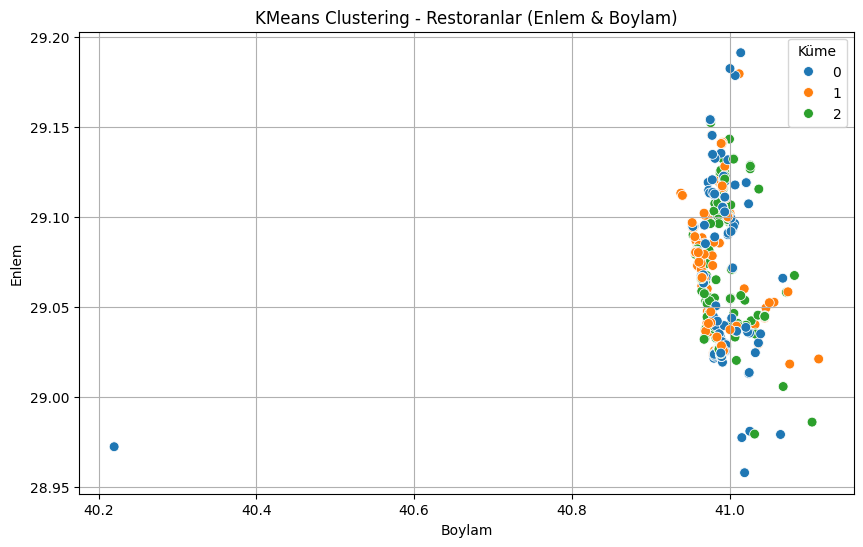

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Görselleştirme: Enlem-Boylam düzleminde scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Enlem', y='Boylam', hue='Cluster', palette='tab10', s=50)
plt.title('KMeans Clustering - Restoranlar (Enlem & Boylam)')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.grid(True)
plt.legend(title='Küme')
plt.show()

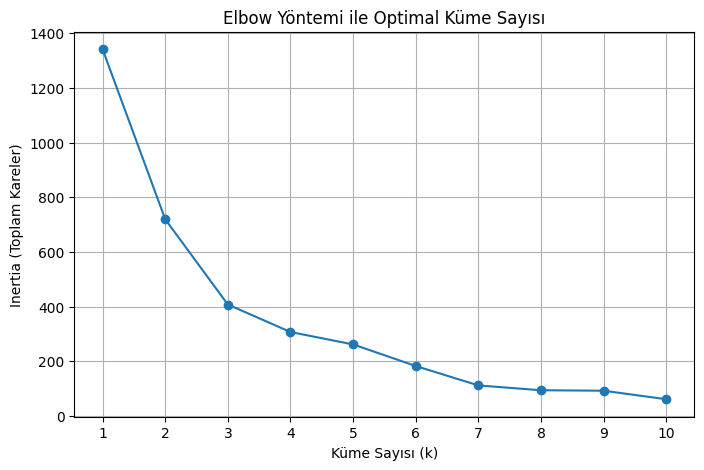

In [14]:
# Elbow yöntemi için küme sayıları
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Daha önce oluşturduğun X veri seti
    inertias.append(kmeans.inertia_)

# Grafik
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısı')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam Kareler)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [15]:
df["Cluster"] = df_clean['Cluster']

In [16]:
df_last = df[["Cluster", "Ortalama Harcama Tutarı", "Map Profile Score"]]
df_last

,Cluster,Ortalama Harcama Tutarı,Map Profile Score
3,0,750.0,67.1815
4,2,750.0,77.7405
5,0,750.0,63.7168
6,0,750.0,63.7161
11,1,2000.0,80.9990
...,...,...,...
776,0,750.0,64.0230
777,1,2000.0,71.6820
778,1,2000.0,74.3270
779,1,2000.0,87.1730


In [17]:
df_last = pd.concat([df[["Enlem","Boylam"]], df_last["Cluster"], df["Restoran Çeşidi"]], axis=1)
df_last

# Cluster 1 ise "Zengin"
df_last["Cluster"] = df_last["Cluster"].replace(1, "Zengin Restoran")
# Cluster 2 ise "Orta Halli"
df_last["Cluster"] = df_last["Cluster"].replace(2, "Orta Halli Restoran")
# Cluster 0 ise "Ucuz"
df_last["Cluster"] = df_last["Cluster"].replace(0, "Ucuz Restoran")

In [18]:
df_last

,Enlem,Boylam,Cluster,Restoran Çeşidi
3,41.019103,28.957953,Ucuz Restoran,Tekne-Event Hall-Catering
4,40.965051,29.072068,Orta Halli Restoran,Modern Pub & Bistro
5,40.988796,29.024508,Ucuz Restoran,Geleneksel Meyhane
6,40.989107,29.028104,Ucuz Restoran,Modern Pub & Bistro
11,40.965141,29.088431,Zengin Restoran,Pub & Bistro & Kokteyl Bar
...,...,...,...,...
776,40.988904,29.024390,Ucuz Restoran,Pub & Bistro & Kokteyl Bar
777,40.940216,29.111933,Zengin Restoran,Yeni Nesil Meyhane
778,40.965125,29.066295,Zengin Restoran,Geleneksel Meyhane
779,40.973249,29.040820,Zengin Restoran,Geleneksel Meyhane


In [19]:
df_last.to_csv("Clustered_Restaurants.csv", index=False)

In [20]:
df_last

,Enlem,Boylam,Cluster,Restoran Çeşidi
3,41.019103,28.957953,Ucuz Restoran,Tekne-Event Hall-Catering
4,40.965051,29.072068,Orta Halli Restoran,Modern Pub & Bistro
5,40.988796,29.024508,Ucuz Restoran,Geleneksel Meyhane
6,40.989107,29.028104,Ucuz Restoran,Modern Pub & Bistro
11,40.965141,29.088431,Zengin Restoran,Pub & Bistro & Kokteyl Bar
...,...,...,...,...
776,40.988904,29.024390,Ucuz Restoran,Pub & Bistro & Kokteyl Bar
777,40.940216,29.111933,Zengin Restoran,Yeni Nesil Meyhane
778,40.965125,29.066295,Zengin Restoran,Geleneksel Meyhane
779,40.973249,29.040820,Zengin Restoran,Geleneksel Meyhane
